In [14]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('ggplot')
# Disable Python INFO and WARNING messages
warnings.filterwarnings('ignore')

In [15]:
# Load employee data 
df = pd.read_csv('data/employee_data.csv')

## 1. Dataset basic information 

In [16]:
# check the overall dataset structure 
df.shape

(14249, 10)

In [17]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [18]:
df.head()

avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              NaN         0.932868           4   
1              232      support              NaN              NaN           3   
2              184        sales              NaN         0.788830           3   
3              206        sales              NaN         0.575688           4   
4              249        sales              NaN         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  
0                NaN     low      0.829896      Left     5.0  
1                NaN     low      0.834544  Employed     2.0  
2                NaN  medium      0.834988  Employed     3.0  
3                NaN     low      0.424764  Employed     2.0  
4                NaN     low      0.779043  Employed     3.0

## 2. Distributions of numerical features

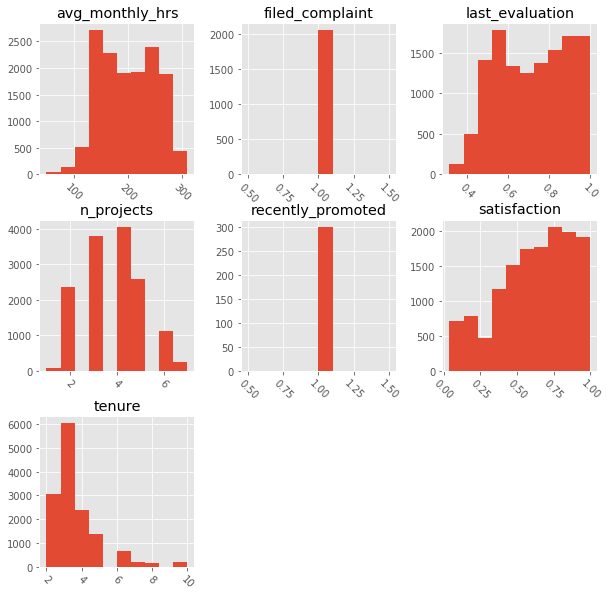

In [19]:
# Plot histogram grid -- check numerical features
df.hist(figsize=(10,10), xrot=-45)
plt.show()

In [20]:
# numerical features statistics
df.describe()

avg_monthly_hrs  filed_complaint  last_evaluation    n_projects  \
count     14249.000000           2058.0     12717.000000  14249.000000   
mean        199.795775              1.0         0.718477      3.773809   
std          50.998714              0.0         0.173062      1.253126   
min          49.000000              1.0         0.316175      1.000000   
25%         155.000000              NaN              NaN      3.000000   
50%         199.000000              NaN              NaN      4.000000   
75%         245.000000              NaN              NaN      5.000000   
max         310.000000              1.0         1.000000      7.000000   

       recently_promoted  satisfaction        tenure  
count              300.0  14068.000000  14068.000000  
mean                 1.0      0.621295      3.497228  
std                  0.0      0.250469      1.460917  
min                  1.0      0.040058      2.000000  
25%                  NaN           NaN           NaN  
50%                  NaN           NaN           NaN  
75%                  NaN           NaN           NaN  
max                  1.0      1.000000     10.000000

## 3. Distributions of categorical features

In [21]:
# categorical features statistics
df.describe(include=['object'])

department salary    status
count       13540  14249     14249
unique         12      3         2
top         sales    low  Employed
freq         3923   6952     10857

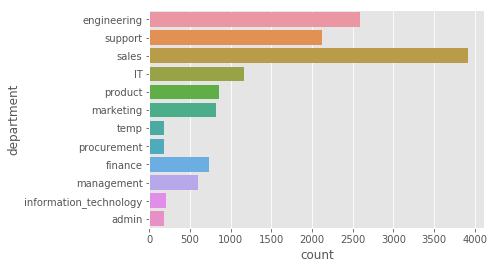

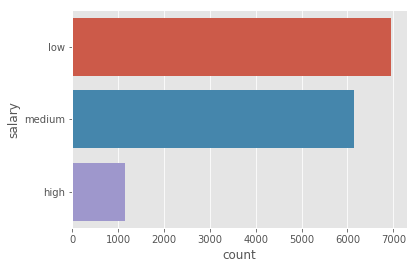

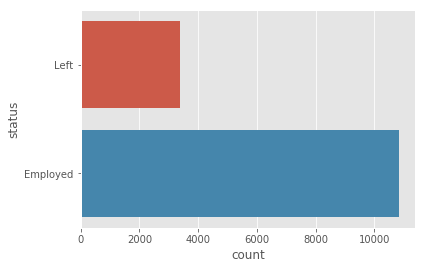

In [22]:
# bar plot for each categorical feature
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

The class 'temp' which groups temporary employees in the 'department' feature will not help us in the scope of our project. 

## 4. Segmentations

**Goal** : It will help us check relationships between our target feature (the employee status) and key numerical and categorical features.

#### Univariate segmentations : 

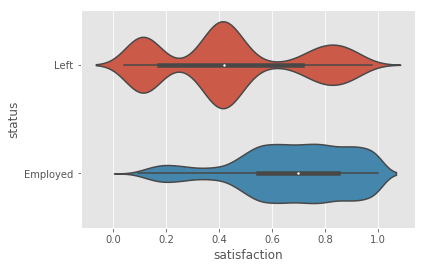

In [23]:
# Segment satisfaction by status and plot distributions
sns.violinplot(y='status', x='satisfaction', data=df)

This plot compares the distributions of satisfaction between employees who left and those still employed. It shows that employees still employed tend to be more satisfied. 

In [24]:
# Segment last_evaluation by status and plot distributions
sns.violinplot(y='status', x='last_evaluation', data=df)

The distribution of employees who left with respect to their last evaluation shows that we might have segmented groups. 

In [25]:
# Segment by status and show the means within each class
df.groupby('status').mean()

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
status                                                                    
Employed       197.700286              1.0         0.714479    3.755273   
Left           206.502948              1.0         0.730706    3.833137   

          recently_promoted  satisfaction    tenure  
status                                               
Employed                1.0      0.675979  3.380245  
Left                    1.0      0.447500  3.869023

In [ ]:
The last plot shows the distribution of employee who left with respect to their last evaluation and satisfaction. It looks like there are  few clusters of people who left. We can intuitively classify them as : 

   * **Underperformers**: for last_evaluation < 0.6
   * **Unhappy**: for satisfaction_level < 0.2 (maybe they are overqualified?)
   * **Overachievers**: last_evaluation > 0.8 and satisfaction > 0.7

#### Bivariate segmentations :

In [28]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction', y='last_evaluation', hue='status', data=df, fit_reg=False)

In [29]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status == 'Left'], fit_reg=False)

The last plot shows the distribution of employee who left with respect to their last evaluation and satisfaction. It looks like there are  few clusters of people who left. We can intuitively classify them as : 

   * **Underperformers**: for last_evaluation < 0.6
   * **Unhappy**: for satisfaction_level < 0.2 (maybe they are overqualified?)
   * **Overachievers**: last_evaluation > 0.8 and satisfaction > 0.7